In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
import scipy.stats as st
import seaborn as sns
import numpy as np


In [2]:
# Specify the file path
file_path = './Resources/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,product,date_time,external_measurement_weight,height_avg
0,13 oz Ribeye Tail A,2024-06-03 07:16:28,16.76,1.62952
1,13 oz Ribeye Tail A,2024-06-03 07:16:47,16.12,1.02086
2,16 oz Ribeye Tail A,2024-06-03 07:17:36,16.34,1.03975
3,16 oz Ribeye Tail A,2024-06-03 07:17:53,16.16,1.05378
4,16 oz Ribeye Tail A,2024-06-03 07:18:08,16.12,1.03522
...,...,...,...,...
36155,7 oz S Sirloin A,2024-06-28 22:58:13,6.82,1.25516
36156,7 oz S Sirloin A,2024-06-28 22:58:23,6.86,1.29131
36157,7 oz S Sirloin A,2024-06-28 22:58:36,6.94,1.36985
36158,7 oz S Sirloin A,2024-06-28 22:59:01,6.80,1.32573


In [3]:
file_path2 = './Resources/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Display the DataFrame
display(df2)

,product,weight_min,weight_max,thick_min,thick_max
0,10 oz Sirloin A,9.12,10.12,1.10,1.75
1,11 oz Sirloin B,10.08,11.08,1.10,1.75
2,11 oz Sirloin C,10.45,11.54,1.10,1.75
3,13 oz Ribeye Tail A,11.95,14.04,0.50,3.00
4,16 oz Strip A,14.45,17.54,0.50,3.00
5,16 oz Dry Age Ribeye A,14.95,17.04,0.95,3.00
6,16 oz Prime Strip A,14.95,17.04,0.95,3.00
7,16 oz Ribeye Tail A,14.95,17.04,0.50,3.00
8,18 oz Ribeye A,15.95,20.04,0.75,1.75
9,20 oz Prime Ribeye A,18.95,21.10,0.95,2.00


In [4]:
#separate 1 product from remainder 
#find stdev, mean, max, and min throw into chart (will serve this with the histgram)
#determine bin widths
#determine max/ min of x axis (dynamic)
#min/max of y axis (dynamic)
#create variables of mean and the specs to throw vertical lines to the x-axis
    #this means merging tables###
#find outliers

In [5]:
sirloin_8 = df.loc[df["product"] == "8 oz S Sirloin B"]

sirloin_8

,product,date_time,external_measurement_weight,height_avg
1107,8 oz S Sirloin B,2024-06-03 18:31:48,7.66,1.14291
1108,8 oz S Sirloin B,2024-06-03 18:31:54,7.68,1.19477
1109,8 oz S Sirloin B,2024-06-03 18:31:58,7.84,1.39799
1110,8 oz S Sirloin B,2024-06-03 18:32:03,7.60,1.18035
1111,8 oz S Sirloin B,2024-06-03 18:32:08,7.86,1.15461
...,...,...,...,...
35777,8 oz S Sirloin B,2024-06-28 21:46:27,7.94,1.67327
35778,8 oz S Sirloin B,2024-06-28 21:46:31,8.00,1.28549
35779,8 oz S Sirloin B,2024-06-28 21:46:40,8.08,1.60402
35780,8 oz S Sirloin B,2024-06-28 21:46:44,8.04,1.29816


In [50]:
##do another loc here to get rid of IQR values 
chart_sirloin_8 = sirloin_8.describe()
chart_sirloin_8

,external_measurement_weight,height_avg
count,2088.000000,2088.000000
mean,8.035182,1.374410
std,0.266098,0.136490
min,7.380000,1.027280
25%,7.840000,1.279027
50%,8.060000,1.359870
75%,8.240000,1.453275
max,8.660000,2.157400


In [7]:
sirloin_8_wt = sirloin_8[["product","date_time","external_measurement_weight"]]
sirloin_8_wt

,product,date_time,external_measurement_weight
1107,8 oz S Sirloin B,2024-06-03 18:31:48,7.66
1108,8 oz S Sirloin B,2024-06-03 18:31:54,7.68
1109,8 oz S Sirloin B,2024-06-03 18:31:58,7.84
1110,8 oz S Sirloin B,2024-06-03 18:32:03,7.60
1111,8 oz S Sirloin B,2024-06-03 18:32:08,7.86
...,...,...,...
35777,8 oz S Sirloin B,2024-06-28 21:46:27,7.94
35778,8 oz S Sirloin B,2024-06-28 21:46:31,8.00
35779,8 oz S Sirloin B,2024-06-28 21:46:40,8.08
35780,8 oz S Sirloin B,2024-06-28 21:46:44,8.04


In [52]:
min_wt = np.min(sirloin_8['external_measurement_weight'])
max_wt = np.max(sirloin_8['external_measurement_weight'])

# min = 7.38 oz #max 8.66
binmin = np.floor(min_wt)
binmax = np.ceil(max_wt)
binmax

num_bins = int((binmax-binmin)*(1/.25))

num_bins


8

In [ ]:

# Found size of bins and failed at plotting due to object vs float error -- bins need to be bin maxes 
# size_bins = list(np.arange(binmin, binmax + 1, 0.25))
# size_bins

top_bin = 




sirloin_8_wt

histo_wt = pd.cut(sirloin_8_wt['external_measurement_weight'], bins= top_bin)

histo_wt = pd.DataFrame(histo_wt)

histo_wt

In [38]:
####NOTE + TO DO need to change tHE BIN LABELS AND BINS TO NUMBERS OR CAN'T CALL VERTICALS 
histo_grp = histo_wt.groupby('external_measurement_weight')['external_measurement_weight'].count()


histo_grp = pd.DataFrame(histo_grp)

histo_grp = histo_grp.rename(columns= {'external_measurement_weight' : 'count'})

histo_grp = histo_grp.reset_index()

histo_grp


C:\Users\19727\AppData\Local\Temp\ipykernel_10456\2601531283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  histo_grp = histo_wt.groupby('external_measurement_weight')['external_measurement_weight'].count()


,external_measurement_weight,count
0,"(7.0, 7.25]",0
1,"(7.25, 7.5]",45
2,"(7.5, 7.75]",309
3,"(7.75, 8.0]",576
4,"(8.0, 8.25]",666
5,"(8.25, 8.5]",470
6,"(8.5, 8.75]",22


TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

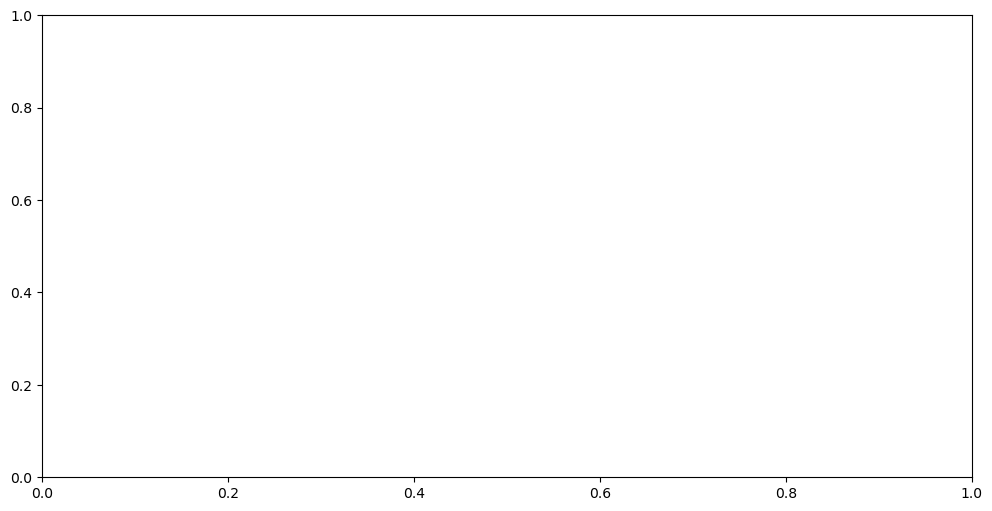

In [39]:
plt.figure(figsize=(12, 6))

bars = plt.bar(histo_grp['external_measurement_weight'],histo_grp['count'])

plt.show()
# # Plotting the bar graph
# plt.figure(figsize=(12, 6))

# # Iterate over the rate of growth values to set the color accordingly
# colors = ['darkred' if rate > 0 else 'teal' for rate in df_2016['Rate_of_Growth']]

# # Plotting the bars with colors based on the rate of growth
# bars = plt.bar(df_2016['ParentLocationCode'], df_2016['Rate_of_Growth'], color=colors)

# plt.xlabel('Region', color='white')  # Set label color to white
# plt.ylabel('Rate of Growth (%)', color='white')  # Set label color to white
# plt.title('Rate of Consumption Growth for Each Region (2016)', color='white')  # Set title color to white
# plt.xticks(color='white')  # Set tick color to white
# plt.yticks(color='white')  # Set tick color to white
# plt.grid(axis='y', linestyle='--', alpha=0.6, color='white')  # Set grid line color to white

# # Set color of all lines to white
# plt.gca().spines['top'].set_color('white')
# plt.gca().spines['bottom'].set_color('white')
# plt.gca().spines['left'].set_color('white')
# plt.gca().spines['right'].set_color('white')

# # Set background color to transparent
# plt.gca().set_facecolor('none')

# # Save the figure as a PNG with a transparent background
# plt.savefig('bar_chart.png', transparent=True)

# plt.show()